In [4]:
import h5py as h5
import pandas as pd
from pathlib import Path
import json
from collections import Counter
import numpy as np
from pytz import timezone, utc
from datetime import datetime
import matplotlib.pyplot as plt
import scipy
import neurokit2 as nk
import statistics
from scipy.signal import butter, lfilter

from snorkel.labeling import labeling_function
from snorkel.labeling import LabelingFunction
from snorkel.preprocess import preprocessor
from snorkel.labeling import LFAnalysis
from snorkel.labeling import PandasLFApplier
from scipy.signal import find_peaks
from neurokit2.signal import signal_rate
from neurokit2.signal import signal_timefrequency

In [41]:
preprocessedRR_path = './preRR.pkl'
preprocessedSP_path = './preSP.pkl'

eastern = timezone('US/Eastern')
file = '20190610_1962121_1549083.h5'
filename = './data/'+ file
seriesOptions = {
    'hr': '/data/numerics/HR.HR',
    'rr': '/data/numerics/RR.RR',
    'spo2': ['/data/numerics/SpO₂.SpO₂', '/data/numerics/SpO₂T.SpO₂T'],
    'ecg':['/data/waveforms/I','/data/waveforms/II','/data/waveforms/III','/data/waveforms/V','/data/waveforms/aVF','/data/waveforms/aVL','/data/waveforms/aVR','/data/waveforms/MCL'],
    'pleth': '/data/waveforms/Pleth',
    'plethT': '/data/waveforms/PlethT',
    'art': '/data/waveforms/ART',
    'resp': 'data/waveforms/Resp' 
}

In [42]:
rrDF = pd.read_pickle(preprocessedRR_path)
spDF = pd.read_pickle(preprocessedSP_path)
import os
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
h5file = h5.File(filename, mode='r')

In [43]:
#Basetime
meta_obj = json.loads(h5file.attrs['.meta'])
time_obj = datetime.strptime(meta_obj['time_origin'][:-4], "%Y-%m-%d %H:%M:%S.%f")
time_obj = eastern.localize(time_obj)
basetime = time_obj.timestamp()
print(basetime)

1473922200.0


In [59]:
rrDF.loc[81]

filename       20190610_1962121_1549083.h5
series          /data/numerics/RR.RR:value
label_notes                            NaN
real_vs_art                              0
start0                      1474383280.596
start1                      1474383340.596
start2                      1474383400.596
end                         1474383460.596
windowID                                81
fileID                                  14
Name: 81, dtype: object

In [144]:
idx = np.where(rrDF.filename.values == file)[0][0]
savetime = rrDF.loc[idx].start0 #replace rrDF with spDF if you want to look at spo2 data

#Load in HR numeric
h5py_hr = h5file[seriesOptions['hr']]
hr = np.array(h5py_hr[(h5py_hr['time'] > savetime-basetime) & (h5py_hr['time'] < savetime+180-basetime)]['value'])

#Load in ECG II waveform
h5py_wf = h5file[seriesOptions['ecg'][3]]
wf = np.array(h5py_wf[(h5py_wf['time'] > savetime-basetime) & (h5py_wf['time'] < savetime+180-basetime)]['value'])

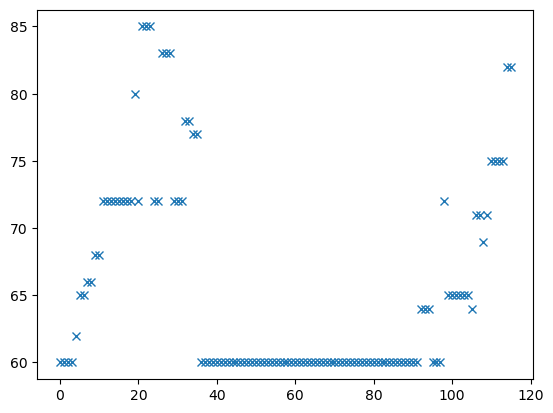

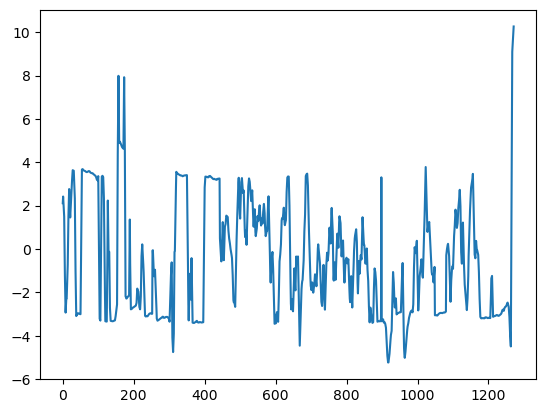

In [146]:
#plot HR numeric
plt.plot(hr, 'x')
plt.show()
#plot ECG V waveform
plt.plot(wf)
plt.show()